. Load and Explore the Dataset

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28), Training labels: (60000,)
Testing data shape: (10000, 28, 28), Testing labels: (10000,)


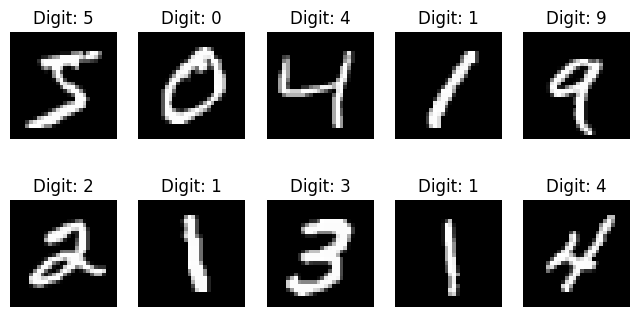

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check shape
print(f"Training data shape: {x_train.shape}, Training labels: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}, Testing labels: {y_test.shape}")

# Visualize some samples
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Digit: {y_train[i]}")
    plt.axis('off')
plt.show()


Preprocessing

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# For deep learning models: reshape to (samples, 28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 Training

In [ ]:
history = model.fit(x_train, y_train_cat, epochs=10, batch_size=128, validation_split=0.1)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - accuracy: 0.8539 - loss: 0.5129 - val_accuracy: 0.9802 - val_loss: 0.0692
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - accuracy: 0.9780 - loss: 0.0695 - val_accuracy: 0.9843 - val_loss: 0.0479
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 92ms/step - accuracy: 0.9869 - loss: 0.0417 - val_accuracy: 0.9890 - val_loss: 0.0390
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.9894 - loss: 0.0330 - val_accuracy: 0.9882 - val_loss: 0.0401
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 91ms/step - accuracy: 0.9930 - loss: 0.0227 - val_accuracy: 0.9892 - val_loss: 0.0404
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 92ms/step - accuracy: 0.9939 - loss: 0.0189 - val_accuracy: 0.9917 - val_loss: 0.0319
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.9943 - loss: 0.0167 - val_accuracy: 0.9882 - val_loss: 0.0407
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.9965 - loss: 0.0122 - 

Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9852 - loss: 0.0482
Test accuracy: 0.9888


Visualize training history (accuracy and loss):

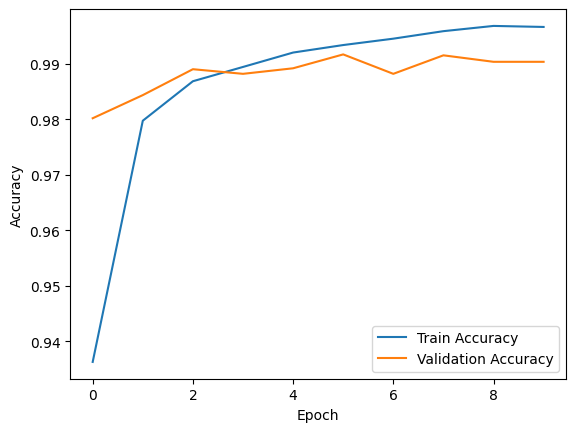

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


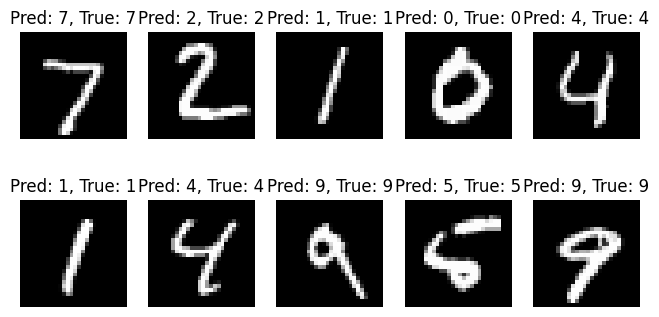

In [ ]:
import numpy as np

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Show some examples
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}, True: {y_test[i]}")
    plt.axis('off')
plt.show()


 Save Your Code & Model

In [ ]:
model.save('mnist_cnn_model.h5')
